# Exploratory Analysis of Pisa Data
## by Julia Kling

## Preliminary Wrangling

About the Data Set:

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading Dataset

df = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')

b'Skipping line 215: expected 636 fields, saw 727\nSkipping line 389: expected 636 fields, saw 859\nSkipping line 564: expected 636 fields, saw 924\n'
b'Skipping line 1162: expected 636 fields, saw 810\nSkipping line 1337: expected 636 fields, saw 840\nSkipping line 1541: expected 636 fields, saw 696\n'
b'Skipping line 2540: expected 636 fields, saw 830\nSkipping line 2714: expected 636 fields, saw 902\n'
b'Skipping line 3089: expected 636 fields, saw 780\nSkipping line 3481: expected 636 fields, saw 728\nSkipping line 3859: expected 636 fields, saw 949\n'
b'Skipping line 4258: expected 636 fields, saw 992\nSkipping line 4642: expected 636 fields, saw 663\n'
b'Skipping line 5831: expected 636 fields, saw 871\nSkipping line 6006: expected 636 fields, saw 659\n'
b'Skipping line 6211: expected 636 fields, saw 783\nSkipping line 6610: expected 636 fields, saw 780\nSkipping line 6786: expected 636 fields, saw 846\nSkipping line 6993: expected 636 fields, saw 719\n'
b'Skipping line 7390: exp

b'Skipping line 108397: expected 878 fields, saw 1082\n'
b'Skipping line 108770: expected 878 fields, saw 890\n'
b'Skipping line 110680: expected 878 fields, saw 1053\n'
b'Skipping line 111060: expected 878 fields, saw 887\n'
b'Skipping line 112382: expected 878 fields, saw 974\nSkipping line 112584: expected 878 fields, saw 1129\n'
b'Skipping line 114487: expected 878 fields, saw 1018\n'
b'Skipping line 116020: expected 878 fields, saw 913\n'
b'Skipping line 117165: expected 878 fields, saw 955\n'
b'Skipping line 118297: expected 878 fields, saw 991\nSkipping line 118472: expected 878 fields, saw 975\n'
b'Skipping line 120383: expected 878 fields, saw 899\nSkipping line 120592: expected 878 fields, saw 939\n'
b'Skipping line 122479: expected 878 fields, saw 942\n'
b'Skipping line 124553: expected 878 fields, saw 924\nSkipping line 124927: expected 878 fields, saw 1006\n'
b'Skipping line 125138: expected 878 fields, saw 1069\nSkipping line 126099: expected 878 fields, saw 1188\n'
b'Ski

b'Skipping line 250092: expected 878 fields, saw 1039\n'
b'Skipping line 251047: expected 878 fields, saw 1021\n'
b'Skipping line 251452: expected 878 fields, saw 926\nSkipping line 252032: expected 878 fields, saw 931\n'
b'Skipping line 253561: expected 878 fields, saw 964\n'
b'Skipping line 256857: expected 878 fields, saw 1070\n'
b'Skipping line 257650: expected 878 fields, saw 956\n'
b'Skipping line 259992: expected 878 fields, saw 1110\n'
b'Skipping line 260787: expected 878 fields, saw 1090\nSkipping line 261369: expected 878 fields, saw 987\n'
b'Skipping line 261577: expected 878 fields, saw 895\n'
b'Skipping line 263128: expected 878 fields, saw 1093\n'
b'Skipping line 263717: expected 878 fields, saw 926\n'
b'Skipping line 264697: expected 878 fields, saw 1146\n'
b'Skipping line 265867: expected 878 fields, saw 917\nSkipping line 266461: expected 878 fields, saw 900\n'
b'Skipping line 267057: expected 878 fields, saw 969\n'
b'Skipping line 268846: expected 878 fields, saw 1000

In [3]:
# check the look of the dataset

df.head(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.shape

(304559, 636)

### What is the structure of the dataset?

> The original Data Set has 304559 rows (observations) and 636 columns (variables).

### Questions 

> Does performane in Math, Reading and Science literacy depend on gender or location?

> Does multicultural background influence student performance?

### Relevant features for further investigation

As not all the variables in the Data Set are relevant in order to answer our research questions, I am selecting the following features for the further investigation. 

> Does performane in Math, Reading and Science literacy depend on age, gender or location?

- ST04Q01,"Gender"
- CNT,"Country code 3-character"
- AGE,"Age of student"
- Average Math Score = PV1MATH + PV2MATH + PV3MATH + PV4MATH + PV5MATH / 5
- Average Reading Score = PV1READ + PV2READ + PV3READ + PV4READ + PV5READ / 5
- Average Science Score = PV1SCIE + PV2SCIE + PV3SCIE + PV4SCIE + PV5SCIE / 5

> Does multicultural background influence student performance?

- Feature Engineering: Homogeneous and Heterogeous Student Family background
- Average Math Score = PV1MATH + PV2MATH + PV3MATH + PV4MATH + PV5MATH / 5
- Average Reading Score = PV1READ + PV2READ + PV3READ + PV4READ + PV5READ / 5
- Average Science Score = PV1SCIE + PV2SCIE + PV3SCIE + PV4SCIE + PV5SCIE / 5

(Descriptions have been taken from pisadict2012.csv)

In [5]:
#create dataset with required columns

df = df[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S']]


In [7]:
# check new structure of Data Set

df.shape

(304559, 22)

In [8]:
df.sample(5)

,CNT,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S
202128,Brazil,1996,Male,16.33,529.9969,533.8916,522.9864,545.5756,512.0813,526.5389,...,570.6459,544.1817,567.2697,541.16,511.3204,533.7001,538.3626,Brazil,Brazil,Brazil
292682,Canada,1996,Male,15.33,435.5897,458.9578,504.1362,469.084,454.2842,499.5133,...,450.5947,445.783,493.6964,439.6121,499.2913,479.7091,457.3294,Canada,Canada,Canada
237571,Ireland,1996,Male,15.42,381.1419,388.9313,370.2368,409.9626,400.6154,360.0551,...,386.5193,404.964,409.7725,400.4476,403.2451,417.2324,417.2324,Ireland,Ireland,Ireland
226532,Brazil,1996,Male,16.25,499.6962,511.3803,481.7807,500.4752,498.9173,426.6165,...,340.0065,464.3079,461.3391,476.2589,468.799,476.2589,486.5162,Brazil,Brazil,Brazil
258686,Canada,1996,Male,15.5,383.4787,342.974,350.7634,359.3317,392.047,504.4052,...,397.7465,499.5935,383.6628,350.0932,380.8653,337.0384,419.0974,Another country (CAN),Another country (CAN),Canada


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304559 entries, 0 to 304558
Data columns (total 22 columns):
CNT        304557 non-null object
ST03Q02    304553 non-null object
ST04Q01    304550 non-null object
AGE        304017 non-null object
PV1MATH    303892 non-null object
PV2MATH    303892 non-null object
PV3MATH    303899 non-null object
PV4MATH    303898 non-null object
PV5MATH    303886 non-null object
PV1READ    303844 non-null object
PV2READ    303844 non-null object
PV3READ    303854 non-null object
PV4READ    303849 non-null object
PV5READ    303857 non-null object
PV1SCIE    303838 non-null object
PV2SCIE    303838 non-null object
PV3SCIE    303836 non-null object
PV4SCIE    303839 non-null object
PV5SCIE    303842 non-null object
COBN_F     301189 non-null object
COBN_M     301190 non-null object
COBN_S     301190 non-null object
dtypes: object(22)
memory usage: 51.1+ MB


We can see that all the values in the different columns are strings, which is something we have to be aware of in our further investigation

## Data Wrangling

In [10]:
# converting AGE column from string to numerical

df["AGE"] = pd.to_numeric(df["AGE"],errors='coerce')

In [11]:
# Replace NaN age values with the mean age of students in the dataset

df.loc[np.isfinite(df['AGE']) == False, 'AGE'] = df['AGE'].mean()

In [12]:
# Replace NaN or 'Invalid' values for father/mother birth country to 'Missing'

df.loc[df['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
df.loc[df['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

df.loc[df['COBN_F'] == 'Invalid', 'COBN_F'] = 'Missing'
df.loc[df['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
df.loc[df['COBN_S'] == 'Invalid', 'COBN_S'] = 'Missing'

In [13]:
# Check if there are any columns with null values that will bother the further analysis

df.isnull().sum()

CNT          2
ST03Q02      6
ST04Q01      9
AGE          0
PV1MATH    667
PV2MATH    667
PV3MATH    660
PV4MATH    661
PV5MATH    673
PV1READ    715
PV2READ    715
PV3READ    705
PV4READ    710
PV5READ    702
PV1SCIE    721
PV2SCIE    721
PV3SCIE    723
PV4SCIE    720
PV5SCIE    717
COBN_F       0
COBN_M       0
COBN_S       0
dtype: int64

There are still null values in some columns, but as they are not bothering for now, we can take care of them later.

In [14]:
#convert strings to numerical values

df["PV1MATH"] = pd.to_numeric(df["PV1MATH"],errors='coerce')
df["PV2MATH"] = pd.to_numeric(df["PV2MATH"],errors='coerce')
df["PV3MATH"] = pd.to_numeric(df["PV3MATH"],errors='coerce')
df["PV4MATH"] = pd.to_numeric(df["PV4MATH"],errors='coerce')
df["PV5MATH"] = pd.to_numeric(df["PV5MATH"],errors='coerce')

df["PV1READ"] = pd.to_numeric(df["PV1READ"],errors='coerce')
df["PV2READ"] = pd.to_numeric(df["PV2READ"],errors='coerce')
df["PV3READ"] = pd.to_numeric(df["PV3READ"],errors='coerce')
df["PV4READ"] = pd.to_numeric(df["PV4READ"],errors='coerce')
df["PV5READ"] = pd.to_numeric(df["PV5READ"],errors='coerce')

df["PV1SCIE"] = pd.to_numeric(df["PV1SCIE"],errors='coerce')
df["PV2SCIE"] = pd.to_numeric(df["PV2SCIE"],errors='coerce')
df["PV3SCIE"] = pd.to_numeric(df["PV3SCIE"],errors='coerce')
df["PV4SCIE"] = pd.to_numeric(df["PV4SCIE"],errors='coerce')
df["PV5SCIE"] = pd.to_numeric(df["PV5SCIE"],errors='coerce')

In [15]:
# We are computing the average of student scores in order to determine the PISA score of a student in a particular subject that we are investigating

df['Math Score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Reading Score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['Science Score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5


In [16]:
# Drop unnecessary columns after calculation of average

df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE',], inplace = True)

In [17]:
# Rename columns for better overview

df.rename({'CNT' : 'Country', 'ST03Q02' : 'Birth year', 'ST04Q01' : 'Gender', 'AGE' : 'Age', 'COBN_F' : 'Birth Country Father', 
           'COBN_M' : 'Birth Country Mother', 'COBN_S' : 'Birth Country Child'}, axis = 'columns', inplace = True)


In [18]:
# Determine if student has homogenous or heterogenous family background

df['Parents - Cultural Background'] = (df['Birth Country Father'] == df['Birth Country Mother'])


In [19]:
df.loc[df['Parents - Cultural Background'] == True, 'Parents - Cultural Background'] = 'Same'
df.loc[df['Parents - Cultural Background'] == False, 'Parents - Cultural Background'] = 'Different'

In [20]:
df.head(3)

,Country,Birth year,Gender,Age,Birth Country Father,Birth Country Mother,Birth Country Child,Math Score,Reading Score,Science Score,Parents - Cultural Background
0,Albania,1996,Female,16.17,Albania,Albania,Albania,366.18634,261.01424,371.91348,Same
1,Albania,1996,Female,16.17,Albania,Albania,Albania,470.56396,384.68832,478.12382,Same
2,Albania,1996,Female,15.58,Albania,Albania,Albania,505.53824,405.18154,486.60946,Same


In [21]:
# check for misleading null values in updated data set

df.isnull().sum()

Country                            2
Birth year                         6
Gender                             9
Age                                0
Birth Country Father               0
Birth Country Mother               0
Birth Country Child                0
Math Score                       847
Reading Score                    873
Science Score                    883
Parents - Cultural Background      0
dtype: int64

We can see that there are null values that will bother the further analysis.

In [21]:
# drop misleading null values

df.dropna(inplace=True)

In [22]:
# check unique values in order to understand the column content better

def show_unique_values(df, var_list):
    for var in var_list:
        print(var, ' Unique Values:\n', df[var].unique(), '\n')

show_unique_values(df, df.columns.tolist())

Country  Unique Values:
 ['Albania' 'Australia' 'Spain' 'United Arab Emirates' 'Argentina'
 'Estonia' 'Finland' 'Austria' 'Belgium' 'France' 'United Kingdom'
 'Bulgaria' 'Brazil' 'Greece' 'Hong Kong-China' 'Croatia' 'Canada'
 'Hungary' 'Indonesia' 'Ireland' 'No' 'Iceland' 'Israel' 'Italy'
 'Switzerland'] 

Birth year  Unique Values:
 ['1996' '1997' 'Agree' 'No' 'Not at all confident'
 'Working full-time <for pay> '] 

Gender  Unique Values:
 ['Female' 'Male' 'Agree' 'Working full-time <for pay> '
 'Not very confident' 'Country of test' 'Disagree'] 

Age  Unique Values:
 [ 1.6170000e+01  1.5580000e+01  1.5670000e+01  1.5500000e+01
  1.6080000e+01  1.5830000e+01  1.5920000e+01  1.6000000e+01
  1.5750000e+01  1.6250000e+01  1.5330000e+01  1.5420000e+01
  1.5250000e+01  1.6330000e+01  2.8820000e-01  1.5932861e+01
  1.9000000e+00  7.7000000e-01  5.0540000e-01 -6.5980000e-01
 -4.7000000e-01 -8.0000000e-02  5.2600000e-02  1.0200000e+00
  1.0416000e+00  2.1710000e-01  8.2410000e+01 -6.0410000e

We can see that there are unneccesary values in the columns of interest.

In [23]:
# herewith we are getting rid of unneccesary values

df = df[df['Age'] < 50]  

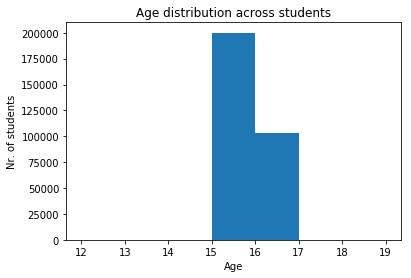

In [27]:
# we are plotting Age in order to see what age range is represented in the data set to make sure the data is not misleading

bin_edges = np.arange(12, 20, 1)
plt.hist(data = df, x = 'Age', bins = bin_edges)

plt.xlabel('Age');
plt.ylabel('Nr. of students')
plt.title("Age distribution across students");

We can see that indeed most of the participants in the data set are 15 years old. The age range is between 15 and 17.

## Univariate Exploration

> Does performane in Math, Reading and Science literacy depend on gender or location?

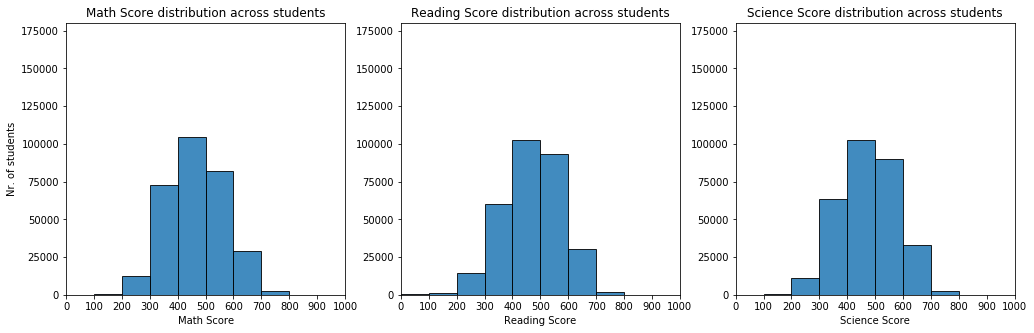

In [28]:
# In order to answer this, we need to look at the general distribution of student performance first in order to determine if there is a difference in student performance at all
# to get a better view on the data, we drop null values 

plt.figure(figsize = [17, 5])
bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df['Math Score'].dropna().values, bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Nr. of students')
plt.title("Math Score distribution across students");

plt.subplot(1, 3, 2)
plt.hist(df['Reading Score'].dropna().values, bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.title("Reading Score distribution across students");

plt.subplot(1, 3, 3)
plt.hist(df['Science Score'].dropna().values, bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score');
plt.title("Science Score distribution across students");


We can see that the performance distribution of Math Score, Reading Score and Science Score is normal. Therefore we can conclude that the PISA test has been conducted in a proper manner.
Most students scored between 400 and 500 points.

> Does multicultural background influence student performance?

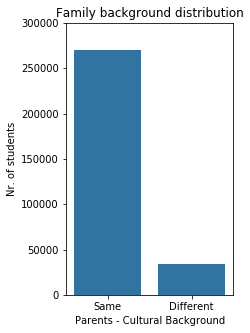

In [29]:
# In order to answer this question, we will look at the proportion of students with homogeneous and heterogeneous background first 

plt.figure(figsize=[3, 5]);
sb.countplot(x = 'Parents - Cultural Background', data = df, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 300000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Nr. of students");
plt.title('Family background distribution');

We can see that there are way more students having a homogeneous family background than having a heterogeneous family background in the PISA study. This might be a misleading factor in the further analysis.

## Bivariate Exploration

> Does performane in Math, Reading and Science literacy depend on gender or location?

In [30]:
# check country columns for irrelevant values

df.Country.unique()

array(['Albania', 'Australia', 'Spain', 'United Arab Emirates',
       'Argentina', 'Estonia', 'Finland', 'Austria', 'Belgium', 'France',
       'United Kingdom', 'Bulgaria', 'Brazil', 'Greece',
       'Hong Kong-China', 'Croatia', 'Canada', 'Hungary', 'Indonesia',
       'Ireland', 'No', 'Iceland', 'Israel', 'Italy', 'Switzerland'],
      dtype=object)

In [31]:
# drop irrelevant values

df.drop(df.index[df['Country'] == 'Mostly like me'], inplace = True)
df.drop(df.index[df['Country'] == 'Itme Lessons'], inplace = True)
df.drop(df.index[df['Country'] == 0], inplace = True)
df.drop(df.index[df['Country'] == 'No'], inplace = True)
df.drop(df.index[df['Country'] == 'Disagree'], inplace = True)
df.drop(df.index[df['Country'] == 'U booklets'], inplace = True)

In [32]:
# check unique values again

df.Country.unique()

array(['Albania', 'Australia', 'Spain', 'United Arab Emirates',
       'Argentina', 'Estonia', 'Finland', 'Austria', 'Belgium', 'France',
       'United Kingdom', 'Bulgaria', 'Brazil', 'Greece',
       'Hong Kong-China', 'Croatia', 'Canada', 'Hungary', 'Indonesia',
       'Ireland', 'Iceland', 'Israel', 'Italy', 'Switzerland'],
      dtype=object)

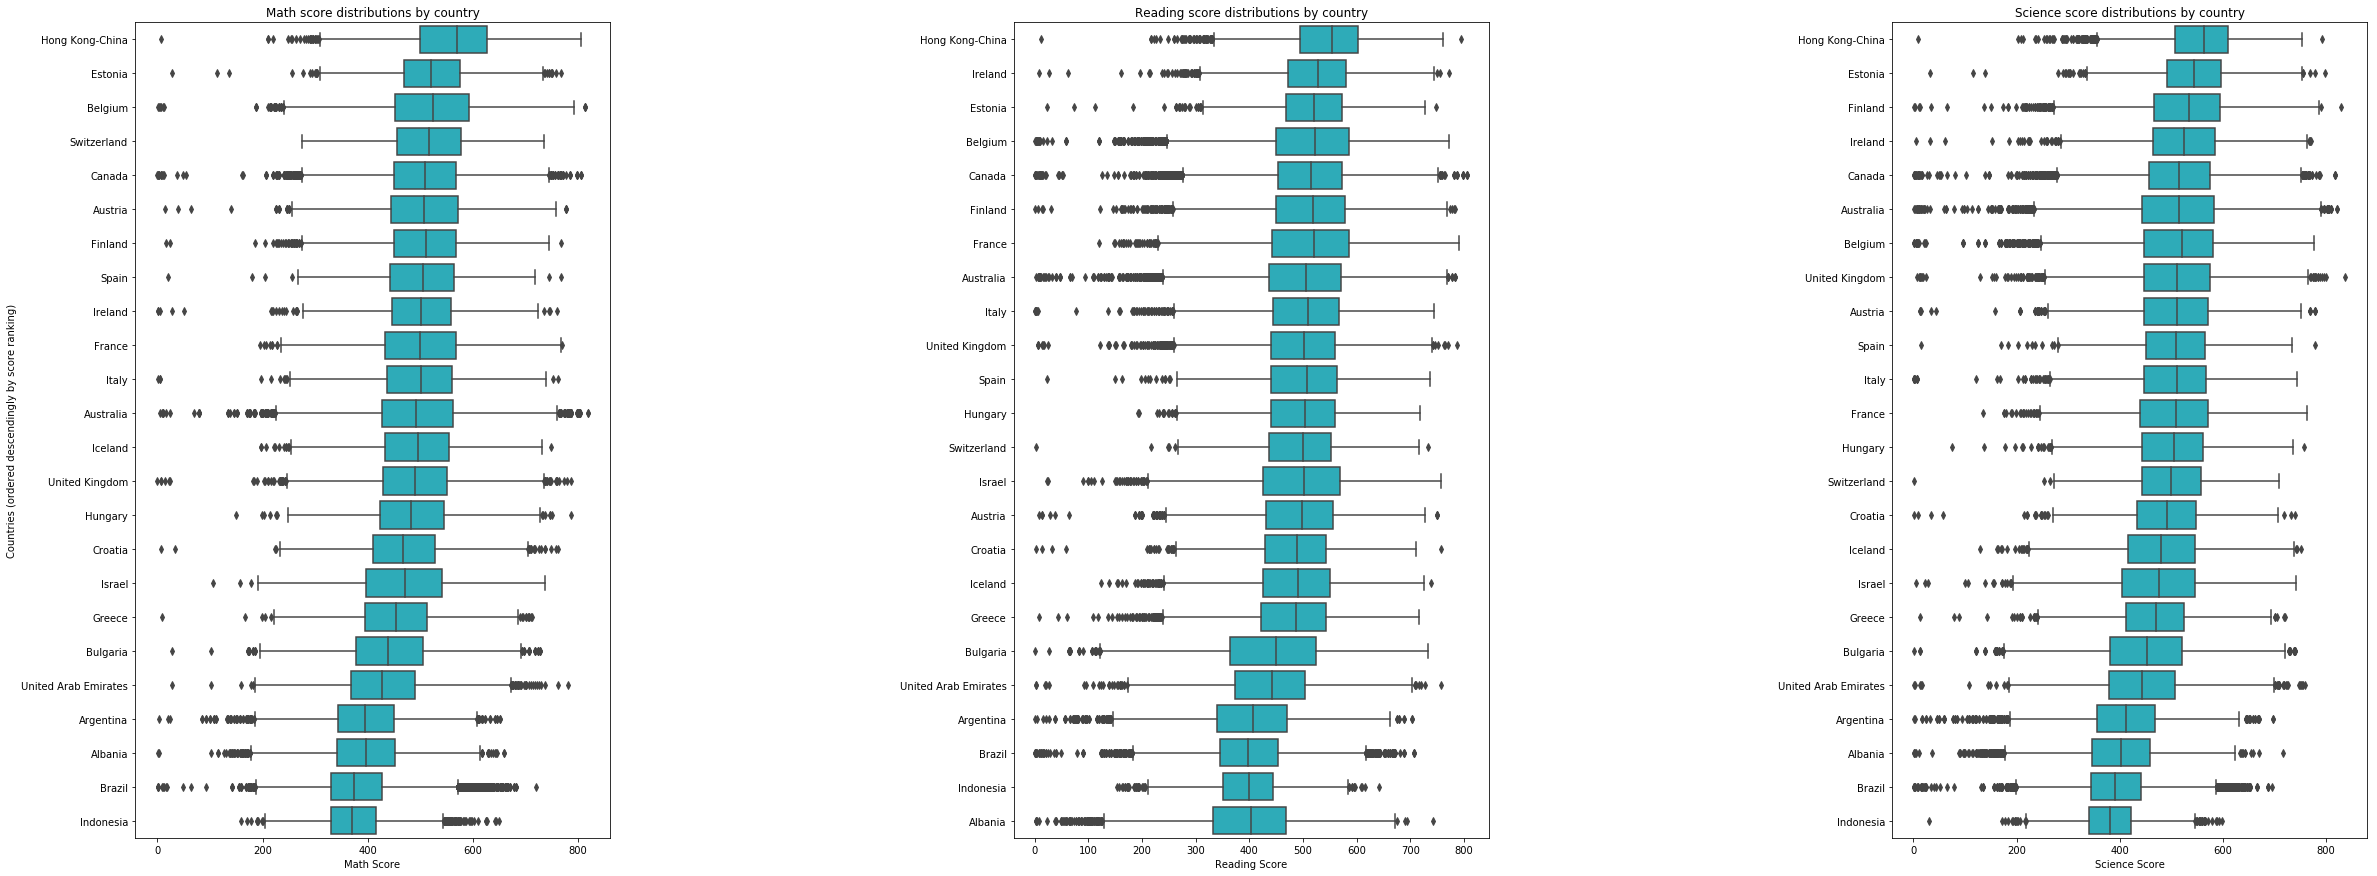

In [33]:
# plot location influence on student performance in different categories

plt.figure(figsize = [40, 15])
plt.subplots_adjust(wspace = 0.85)

math_score_country_order = df.groupby('Country')['Math Score'].mean().sort_values(ascending = False).index
reading_score_country_order = df.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
science_score_country_order = df.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Math Score'], y = df['Country'], order = math_score_country_order, color = sb.color_palette()[9]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Reading Score'], y = df['Country'], order = reading_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Science Score'], y = df['Country'], order = science_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

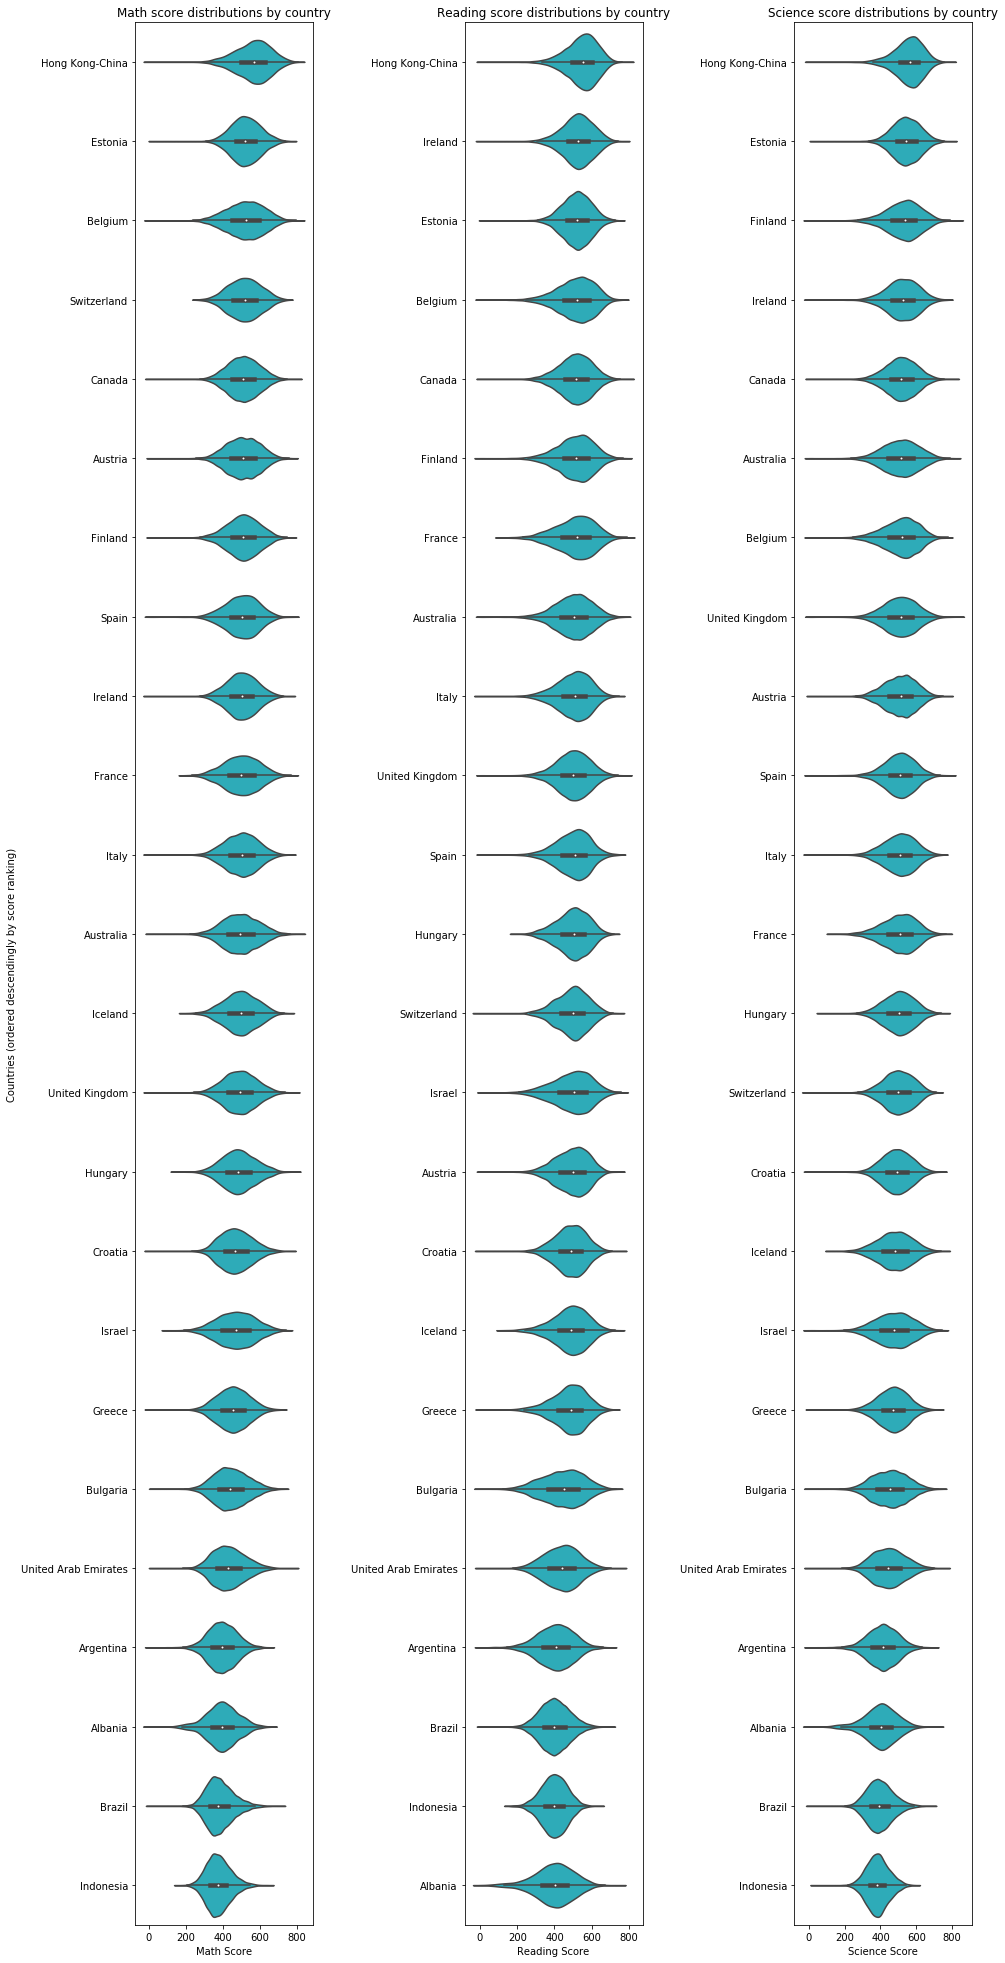

In [38]:
# comparing results with a violin plot

plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.85)

math_score_country_order = df.groupby('Country')['Math Score'].mean().sort_values(ascending = False).index
reading_score_country_order = df.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
science_score_country_order = df.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.violinplot(x = df['Math Score'], y = df['Country'], order = math_score_country_order, color = sb.color_palette()[9]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sb.violinplot(x = df['Reading Score'], y = df['Country'], order = reading_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.violinplot(x = df['Science Score'], y = df['Country'], order = science_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');


We may say that the country of origin seems to make a difference in student performance, as the best performing countries in Math, Reading and Science score on average highest throughout all three categories. Outstanding results are showing Hong Kong- China, as it is on the first place for all 3 categories and Estonia, as it is on the 2nd place for Math and Science and on the 3rd for Reading.
Still we may also say that the difference between the participating countries is not significantly different.


In [35]:
# Check unique values for Gender in order to determine unneccesary values

df.Gender.unique()

array(['Female', 'Male', 'Agree', 'Working full-time <for pay> ',
       'Not very confident', 'Disagree'], dtype=object)

In [36]:
# Drop irrelevant values

df.drop(df.index[df['Gender'] == 'Agree'], inplace = True)
df.drop(df.index[df['Gender'] == 'Strongly agree'], inplace = True)
df.drop(df.index[df['Gender'] == 'Working full-time <for pay> '], inplace = True)
df.drop(df.index[df['Gender'] == 'Major in college Science'], inplace = True)
df.drop(df.index[df['Gender'] == 'Not very confident'], inplace = True)
df.drop(df.index[df['Gender'] == 'Disagree'], inplace = True)

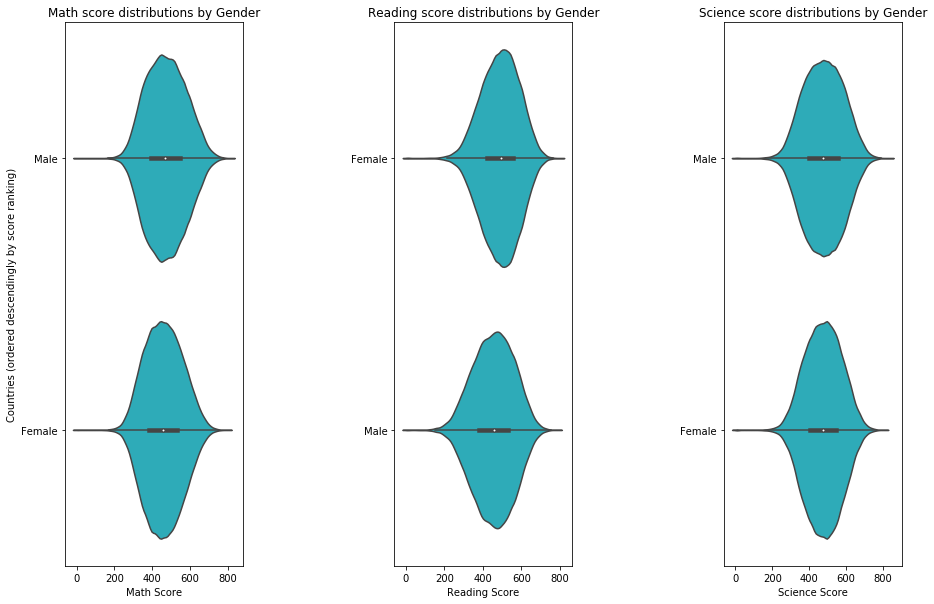

In [37]:
# The comparison of the student performance throughout Math, Reading and Science should be easier now

plt.figure(figsize = [15, 10])
plt.subplots_adjust(wspace = 0.85)

math_score_country_order = df.groupby('Gender')['Math Score'].mean().sort_values(ascending = False).index
reading_score_country_order = df.groupby('Gender')['Reading Score'].mean().sort_values(ascending = False).index
science_score_country_order = df.groupby('Gender')['Science Score'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.violinplot(x = df['Math Score'], y = df['Gender'], order = math_score_country_order, color = sb.color_palette()[9]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by Gender');

plt.subplot(1, 3, 2)
sb.violinplot(x = df['Reading Score'], y = df['Gender'], order = reading_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by Gender');

plt.subplot(1, 3, 3)
sb.violinplot(x = df['Science Score'], y = df['Gender'], order = science_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); 
plt.title('Science score distributions by Gender');

Based on the results, we may say that gender does not seem to play a significant role in student performance. Though something interesting to observe is that male participants scored higher on average on Math and Science, whereas female participants scored higher on Reading.

> Does multicultural background influence student performance?

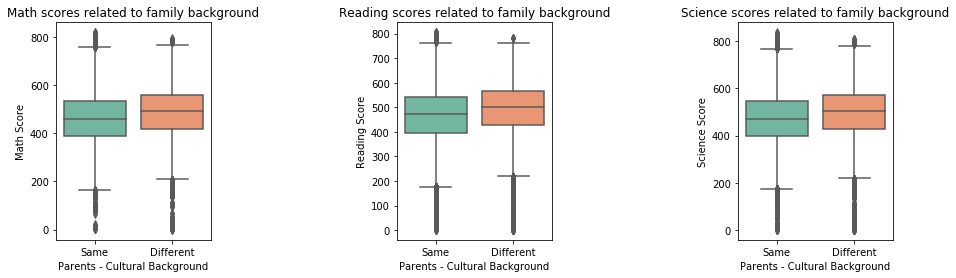

In [46]:
# plot family background influence on student performance

plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Parents - Cultural Background'], y = df['Math Score'], palette = 'Set2')
plt.title('Math scores related to family background');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Parents - Cultural Background'], y = df['Reading Score'], palette = 'Set2')
plt.title('Reading scores related to family background');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Parents - Cultural Background'], y = df['Science Score'], palette = 'Set2');
plt.title('Science scores related to family background');

We can see that, on average, students in our dataset coming from heterogenic family backgrounds show better performance in all categories, compared to students from homogenous family backgrounds.
This needs to be further investigated though, as we have seen that the group of student coming from a heterogenous background is way smaller than the group coming from a homogeneous background in our dataset. Therefore this result might be misleading.

## Multivariate Exploration

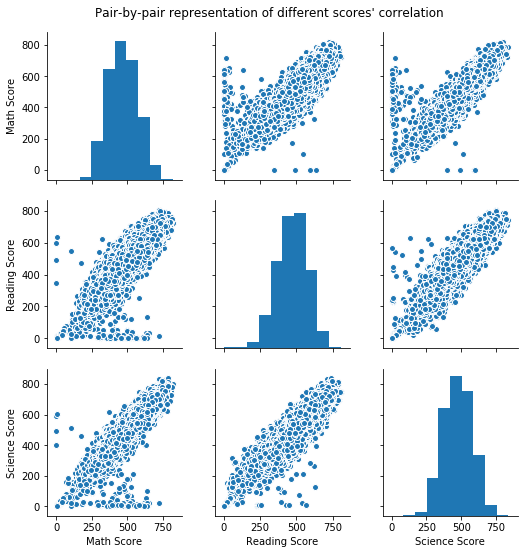

In [40]:
# plot relationship between the different performance categories in order to get inside about their relationship

grid = sb.pairplot(data = df, vars=["Math Score", "Reading Score", "Science Score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);

We can see above that there is a relationship between all the performance categories, which makes us think that a student that is performing well in one category will also perform well in another category. They are therefore interdependent.

# Conclusion

The student performance in the investigated data set seems to be influenced by location, gender and family background. As we discovered a relationship between Math, Reading and Science scores, such as a sample difference of students with a heterogeneous and a homogeneous family background, the results would need further investigation though.